In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler, RobustScaler
import tensorflow.keras.backend as K
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from tensorflow.keras.layers import Dropout,LSTM, Dense, Conv1D,  MaxPooling1D, TimeDistributed,Input, concatenate, Bidirectional, AveragePooling1D, GRU
from tensorflow.keras.models import Sequential

# Read Data

In [2]:
AAPL = pd.read_csv('AAPL.csv')
AMD = pd.read_csv('AMD.csv')

# Dataset Overview

In [3]:
AAPL

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.513393,0.515625,0.513393,0.513393,0.406782,117258400
1,1980-12-15,0.488839,0.488839,0.486607,0.486607,0.385558,43971200
2,1980-12-16,0.453125,0.453125,0.450893,0.450893,0.357260,26432000
3,1980-12-17,0.462054,0.464286,0.462054,0.462054,0.366103,21610400
4,1980-12-18,0.475446,0.477679,0.475446,0.475446,0.376715,18362400
...,...,...,...,...,...,...,...
9904,2020-03-26,246.520004,258.679993,246.360001,258.440002,258.440002,63021800
9905,2020-03-27,252.750000,255.869995,247.050003,247.740005,247.740005,51054200
9906,2020-03-30,250.740005,255.520004,249.399994,254.809998,254.809998,41994100
9907,2020-03-31,255.600006,262.489990,252.000000,254.289993,254.289993,49250500


In [4]:
AMD

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-03-17,0.000000,3.302083,3.125000,3.145833,3.145833,219600
1,1980-03-18,0.000000,3.125000,2.937500,3.031250,3.031250,727200
2,1980-03-19,0.000000,3.083333,3.020833,3.041667,3.041667,295200
3,1980-03-20,0.000000,3.062500,3.010417,3.010417,3.010417,159600
4,1980-03-21,0.000000,3.020833,2.906250,2.916667,2.916667,130800
...,...,...,...,...,...,...,...
10093,2020-03-26,45.779999,47.500000,45.400002,47.500000,47.500000,73680200
10094,2020-03-27,46.320000,47.980000,45.900002,46.580002,46.580002,74599200
10095,2020-03-30,47.240002,48.459999,46.660000,47.860001,47.860001,68486600
10096,2020-03-31,47.930000,48.529999,45.160000,45.480000,45.480000,83483700


# Data Exploration

**Hal yang dilakukan:**

- Identifikasi **dimensi** untuk kedua dataset.
- Investigasi **nilai null**.
- Observasi **tipe data** setiap kolom.
- Mengidentifikasi **kejanggalan** berdasarkan info dataset.

**Fakta:**

- Kedua dataset yang diberikan memiliki **persamaan nama kolom dan tipe data** untuk setiap kolomnya. Namun, dataset saham perusahaan AAPL memiliki jumlah baris yang berbeda dengan perusahaan AMD. Untuk perusahaan **AAPL** memiliki **9909** baris, dan perusahaan **AMD** memiliki **10098**.
- Pada info kedua dataset menampilkan bahwa **tidak ada nilai null** yang terdeteksi. Namun, jika diteliti lebih dalam pada preview dataset, **tanggal** untuk kedua dataset **tidak penuh dalam seminggu**. Dimana tanggal yang ada pada dataset hanya hari **senin sampai jumat** dan **bukan tanggal merah**. Artinya, sabtu, minggu, dan tangggal merah seperti natal tidak memiliki record.
- **Tipe data** yang **dominan** pada dataset adalah tipe data **numerikal**, seperti integer dan float. Terdapat juga tipe data lainnya seperti **object** untuk kolom **Date**.
- Pada kolom **Date** merepresentasikan tanggal, namun masih teridentifikasi sebagai **object**. Sehingga tipe data perlu **diubah** menjadi **datetime**.

**Langkah selanjutnya**:

- **Mengisi tanggal hari libur** agar windows size berjumlah sama tiap minggunya.
- **Mengisi null** value pada tanggal yang baru ditambahkan dengan nilai sebelumnya.
- **Mengubah** kolom **Date** menjadi tipe data **datetime**.

In [5]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9909 entries, 0 to 9908
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       9909 non-null   object 
 1   Open       9909 non-null   float64
 2   High       9909 non-null   float64
 3   Low        9909 non-null   float64
 4   Close      9909 non-null   float64
 5   Adj Close  9909 non-null   float64
 6   Volume     9909 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 542.0+ KB


In [6]:
AMD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10098 entries, 0 to 10097
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       10098 non-null  object 
 1   Open       10098 non-null  float64
 2   High       10098 non-null  float64
 3   Low        10098 non-null  float64
 4   Close      10098 non-null  float64
 5   Adj Close  10098 non-null  float64
 6   Volume     10098 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 552.4+ KB


## Summary statistics

**Hal yang dilakukan:**

- Mengidentifikasi **baris duplikat**.
- Mengidentifikasi **nilai anomali**.
- Menelaah **nilai varians**.
- Mengidentifikasi **kejanggalan** berdasarkan ringkasan statistik.

**Fakta:**

- Telah di identifikasi bahwa kedua dataset **tidak memiliki data yang duplikat**.
- Dilihat pada nilai **mean** dan **median**, terindikasi bahwa kedua dataset mayoritas **memiliki nilai anomali** untuk setiap kolomnya, karena **terdapat rentang** antar kedua nilai tersebut. Namun nilai anomali ini tidak dapat dihapus atau tergantikan, karena digunakan sebagai indikasi `peak value` pada pergerakan harga saham.
- Perlu diperhatikan lebih lagi bahwa nilai **standar deviasi** untuk setiap kolomnya mengindikasikan bahwa sebaran nilai nya **cukup tinggi**, seperti pada dataset **AAPL** contohnya, yang menyentuh angka **50 lebih**. Artinya, pergerakan saham AAPL **sangatlah fluktuatif**.
- Sebelumnya telah dilihat bahwa kedua dataset memiliki nilai **standar deviasi yang tinggi**. Dengan ini dapat menyebabkan model yang dibuat nanti memiliki **komputasi yang kompleks**, lalu berpengaruh pada performa model.

**Langkah selanjutnya:**

Melakukan scaling pada kedua dataset menggunakan RobustScaler dari library sklearn. RobustScaler akan mentransformasi nilai dengan formula berikut:
$$
  Xscaled​= \frac{X - Q2}{Q3 - Q1}
$$

dikurangi nilai median lalu dibagi dengan rentang interkuartil — rentang antara kuartil ke-1 (persentil ke-25) dan ke-3 kuartil (persentil ke-75). Menariknya, nilai outliers yang ditransformasi dengan RobustScaler akan tetap terdeteksi. Hal tersebut telah ditulis dalam cetakan ang ditulis oleh Arjan Reurink & Javier Garcia-Bernardo tahun 2020 pada kasus yang sama, yaitu data harga saham. Dengan menggunakan RobustScaler data yang telah di scaling akan tetap merepresentasikan nilai aktualnya.

Reference:
- Reurink, A., & Garcia-Bernardo, J. (2020). Competing for capitals: the great fragmentation of the firm and varieties of FDI attraction profiles in the European Union. Review of International Political Economy, 1–34. doi:10.1080/09692290.2020.1737564 


In [7]:
AAPL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,9909.000000,9909.000000,9909.000000,9909.000000,9909.000000,9.909000e+03
mean,32.606849,32.936079,32.277560,32.618030,30.576570,8.582916e+07
std,58.415759,59.001576,57.883037,58.471899,56.746275,8.597195e+07
min,0.198661,0.198661,0.196429,0.196429,0.155638,3.472000e+05
25%,1.071429,1.089286,1.048571,1.071429,0.917643,3.304230e+07
50%,1.729286,1.758929,1.696429,1.732143,1.466154,5.766490e+07
75%,35.799999,36.265713,35.328571,35.761429,31.042374,1.069992e+08
max,324.739990,327.850006,323.350006,327.200012,327.200012,1.855410e+09


In [8]:
AAPL.describe(include=['O'])

,Date
count,9909
unique,9909
top,1980-12-12
freq,1


In [9]:
AMD.describe()

,Open,High,Low,Close,Adj Close,Volume
count,10098.000000,10098.000000,10098.000000,10098.000000,10098.000000,1.009800e+04
mean,10.889136,11.462153,10.958702,11.210802,11.210802,1.451625e+07
std,8.615288,8.475056,8.077069,8.283645,8.283645,2.396199e+07
min,0.000000,1.690000,1.610000,1.620000,1.620000,0.000000e+00
25%,4.562500,5.062500,4.812500,4.937500,4.937500,1.098600e+06
50%,9.062500,9.280625,8.875000,9.062500,9.062500,5.518500e+06
75%,14.747500,15.000000,14.435625,14.707500,14.707500,1.742722e+07
max,58.439999,59.270000,57.509998,58.900002,58.900002,3.250584e+08


In [10]:
AMD.describe(include=['O'])

,Date
count,10098
unique,10098
top,1980-03-17
freq,1


# Data transformation

In [22]:
AAPL_copy = AAPL.copy()
AMD_copy = AMD.copy()

## Change date column data type

In [23]:
AAPL_copy['Date'] = pd.to_datetime(AAPL_copy['Date'])
AMD_copy['Date'] = pd.to_datetime(AMD_copy['Date'])

## Handling Null Values

In [25]:
def insert_holidays(data, start_date, end_date):
    data = data.set_index('Date')
    date_range = pd.date_range(start = start_date, end = end_date, freq='D')
    full_date = pd.DataFrame(index = date_range)
    new_data = data.merge(full_date, how='outer', left_index = True, right_index = True)
    new_data = new_data.reset_index()
    new_data.rename(columns={'index': 'Date'}, inplace = True)
    new_data.fillna(method = 'ffill', inplace = True)
    return new_data

In [26]:
AAPL_with_holidays = AAPL_copy.copy()
AMD_with_holidays = AMD_copy.copy()

AAPL_with_holidays = insert_holidays(AAPL_with_holidays,'12/12/1980','4/1/2020')
AMD_with_holidays = insert_holidays(AMD_with_holidays,'3/17/1980','4/1/2020')

## Feature Engineering

In [27]:
AAPL_with_holidays['Day'] = AAPL_with_holidays['Date'].dt.dayofweek
AMD_with_holidays['Day'] = AMD_with_holidays['Date'].dt.dayofweek

# Create Window and Horizon

In [28]:
def create_x_y(data):
    data = data[['Day', 'Close']]
    X = []
    y = []

    for i in range(len(data)):
        if data.loc[i,'Day'] == 0:
            X.append(data.loc[i:i+4, 'Close'].values)
            y.append(data.loc[i, 'Close'])

    X = pd.DataFrame(X)
    y = pd.DataFrame(y)
    return X, y

In [29]:
AAPL_x, AAPL_y = create_x_y(AAPL_with_holidays)
AMD_x , AMD_y = create_x_y(AMD_with_holidays)

# Scaling

In [331]:
scaler = RobustScaler()

AAPL_x_scaled = AAPL_x.copy()
AMD_x_scaled = AMD_x.copy()

AAPL_x_scaled = scaler.fit_transform(AAPL_x)
AMD_x_scaled = scaler.fit_transform(AMD_x)

# Split x and y into train (80%), validation (10%), and test (10%)

In [332]:
# AAPL
AAPL_X_train,AAPL_y_train = AAPL_x_scaled[:1640,:], AAPL_y.iloc[1:1641,:]
AAPL_X_val,AAPL_y_val = AAPL_x_scaled[1640:1845,:], AAPL_y.iloc[1641:1846,:]
AAPL_X_test,AAPL_y_test = AAPL_x_scaled[1845:2050,:], AAPL_y.iloc[1846:,:]

print("Train")
print(f"X_train: {AAPL_X_train.shape}")
print(f"y_train: {AAPL_y_train.shape}")

print("Validation")
print(f"X_val: {AAPL_X_val.shape}")
print(f"y_val: {AAPL_y_val.shape}")

print("Test")
print(f"X_test: {AAPL_X_test.shape}")
print(f"y_test: {AAPL_y_test.shape}")

Train
X_train: (1640, 5)
y_train: (1640, 1)
Validation
X_val: (205, 5)
y_val: (205, 1)
Test
X_test: (205, 5)
y_test: (205, 1)


In [333]:
# AMD
AMD_X_train,AMD_y_train = AMD_x_scaled[:1672,:], AMD_y.iloc[1:1673:]
AMD_X_val,AMD_y_val = AMD_x_scaled[1672:1881,:], AMD_y.iloc[1673:1882,:]
AMD_X_test,AMD_y_test = AMD_x_scaled[1881:-1,:], AMD_y.iloc[1882:,:]

print("Train")
print(f"X_train: {AMD_X_train.shape}")
print(f"y_train: {AMD_y_train.shape}")

print("Validation")
print(f"X_val: {AMD_X_val.shape}")
print(f"y_val: {AMD_y_val.shape}")

print("Test")
print(f"X_test: {AMD_X_test.shape}")
print(f"y_test: {AMD_y_test.shape}")

Train
X_train: (1672, 5)
y_train: (1672, 1)
Validation
X_val: (209, 5)
y_val: (209, 1)
Test
X_test: (208, 5)
y_test: (208, 1)


# Base Model

**Arstitektur baseline**

Baseline model yang hanya terdiri dari **1 hidden layer** dan **1 output layer**. Hidden layer terdiri dari **1 layer LSTM**, dimana ada **50 unit** di dalam layernya. Disamping itu, terdapat juga **output layer**, yang hanya terdiri dari **1 layer Dense** berjumlah **1 unit**. 

**Evaluasi**

Setelah baseline di latih pada kedua dataset, performa prediksi harga saham yang dihasilkan berbeda untuk setiap dataset berdasarkan nilai **MAE**. Dengan nilai MAE, nilai pengukuran rata rata error dapat lebih natural dibandingkan RMSE [1]. Untuk metrics lainnya dapat dilihat pada tabel di bawah ini.

| Model | RMSE | MAE | MAPE |
| --- | --- | --- | --- |
| LSTM (AAPL) | 18.7 | 14 | 0.06 |
| LSTM (AMD) | 2.21 | 1.44 | 0.06 |

Tidak berhenti pada RMSE, evaluasi juga dilakukan melalui **plotting harga prediksi dengan harga aktual**, untuk **mengidentifikasi** apakah **nilai prediksi tidak jauh** atau **meleset dari nilai aktual**. Menariknya, **baseline model** yang dilatih untuk dataset **AMD** menghasilkan **harga prediksi** yang **sangat dekat dengan harga aktual**, dapat dilihat pada [AMD baseline prediction plot](#AMD-baseline-prediction-plot). Di sisi lain, **baseline model** yang dilatih untuk dataset **AAPL** lebih buruk dibandingkan dengan baseline yang dilatih dengan dataset AMD ([AAPL baseline prediction plot](#AAPL-baseline-prediction-plot)). Posisi **harga prediksi** berada **di atas nilai aktual**. Hal ini **di indikasikan** bahwa jika dilihat dari **history loss saat training**, plot dari dataset **AAPL** memiliki progress **penurunan** angka **loss** yang **tidak stabil** ([AAPL baseline loss plot](#AAPL-baseline-loss-plot)) dibandingkan AMD ([AMD baseline loss plot](#AAPL-baseline-loss-plot)).

Referensi:

[1]. *Willmott, C., & Matsuura, K. (2005). Advantages of the mean absolute error (MAE) over the root mean square error (RMSE) in assessing average model performance. Climate Research, 30, 79–82. doi:10.3354/cr030079*


## Architecture

In [465]:
K.clear_session()
del lstm

In [466]:
lstm = Sequential()
lstm.add(LSTM(50, input_shape=(5,1),activation='relu'))
lstm.add(Dense(1, activation = 'linear'))

In [467]:
lstm.compile(loss = 'mean_squared_error', optimizer = 'adam')
lstm.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50)                10400     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 10,451
Trainable params: 10,451
Non-trainable params: 0
_________________________________________________________________


## Training

In [461]:
AAPL_history = lstm.fit(AAPL_X_train, AAPL_y_train, batch_size = 4, epochs = 10, validation_data = (AAPL_X_val, AAPL_y_val))

Epoch 1/10
410/410 [==============================] - 2s 3ms/step - loss: 52.6774 - val_loss: 118.5550
Epoch 2/10
410/410 [==============================] - 1s 3ms/step - loss: 1.1855 - val_loss: 253.4058
Epoch 3/10
410/410 [==============================] - 1s 3ms/step - loss: 1.0950 - val_loss: 23.2112
Epoch 4/10
410/410 [==============================] - 1s 3ms/step - loss: 0.8955 - val_loss: 24.8890
Epoch 5/10
410/410 [==============================] - 1s 3ms/step - loss: 1.2051 - val_loss: 132.4370
Epoch 6/10
410/410 [==============================] - 1s 3ms/step - loss: 1.0804 - val_loss: 23.9355
Epoch 7/10
410/410 [==============================] - 1s 3ms/step - loss: 1.1511 - val_loss: 15.4869
Epoch 8/10
410/410 [==============================] - 1s 3ms/step - loss: 0.8821 - val_loss: 22.4427
Epoch 9/10
410/410 [==============================] - 1s 3ms/step - loss: 1.3321 - val_loss: 46.8999
Epoch 10/10
410/410 [==============================] - 1s 3ms/step - loss: 0.9208 - val

In [468]:
AMD_history = lstm.fit(AMD_X_train, AMD_y_train, batch_size = 4, epochs = 10, validation_data = (AMD_X_val, AMD_y_val))

Epoch 1/10
418/418 [==============================] - 2s 3ms/step - loss: 38.3782 - val_loss: 3.6345
Epoch 2/10
418/418 [==============================] - 1s 3ms/step - loss: 1.7379 - val_loss: 1.2985
Epoch 3/10
418/418 [==============================] - 1s 3ms/step - loss: 1.2459 - val_loss: 0.3633
Epoch 4/10
418/418 [==============================] - 1s 3ms/step - loss: 1.3400 - val_loss: 0.5233
Epoch 5/10
418/418 [==============================] - 1s 3ms/step - loss: 1.1642 - val_loss: 0.6678
Epoch 6/10
418/418 [==============================] - 1s 3ms/step - loss: 1.2634 - val_loss: 0.2588
Epoch 7/10
418/418 [==============================] - 1s 3ms/step - loss: 1.3231 - val_loss: 0.1230
Epoch 8/10
418/418 [==============================] - 1s 3ms/step - loss: 1.1842 - val_loss: 0.0987
Epoch 9/10
418/418 [==============================] - 1s 3ms/step - loss: 1.2427 - val_loss: 0.0676
Epoch 10/10
418/418 [==============================] - 1s 3ms/step - loss: 1.1605 - val_loss: 0.175

## Evaluate

### Define function

In [455]:
class ModelEvaluation():
    def __init__(self, trained_model, loss_history, test_data):
        self.model = trained_model
        self.test_data = test_data
        self.loss_history = loss_history.history['loss']
        self.val_loss_history = loss_history.history['val_loss']
        self.pred_data, self.rmse, self.mae, self.mape = self.__show_metrics()
        
    def __show_metrics(self):
        X_test, y_test = self.test_data[0], self.test_data[1]
        pred = self.model.predict(X_test)
        rmse = np.sqrt(mean_squared_error(pred, y_test.values))
        mae = mean_absolute_error(pred, y_test.values)
        mape = mean_absolute_percentage_error(pred, y_test.values)

        print("Score (RMSE): {}".format(rmse))
        print("Score (MAE): {}".format(mae))
        print("Score (MAPE): {}".format(mape))
        return pred, rmse, mae, mape
    
    def loss_plot(self):
        mse = self.loss_history
        mse_val = self.val_loss_history
        epochs = range(len(mse))

        plt.figure(figsize = (6,3))
        plt.plot(epochs, mse, label= 'Training')
        plt.plot(epochs, mse_val, label= 'Validation')
        plt.legend()
        plt.tight_layout()
        plt.show()
    
    def prediction_plot(self):
        y_test = self.test_data[1]
        plt.plot(range(len(self.pred_data)), self.pred_data, label= 'Prediction')
        plt.plot(range(len(y_test)), y_test.values, label= 'Actual')
        plt.legend()
        plt.tight_layout()
        plt.show()

### AAPL

#### Metrics

In [462]:
AAPL_evaluate = ModelEvaluation(lstm, AAPL_history, (AAPL_X_test, AAPL_y_test))

7/7 [==============================] - 0s 2ms/step
Score (RMSE): 18.706489857393915
Score (MAE): 13.929915674721322
Score (MAPE): 0.06384613791080285


#### AAPL baseline loss plot 

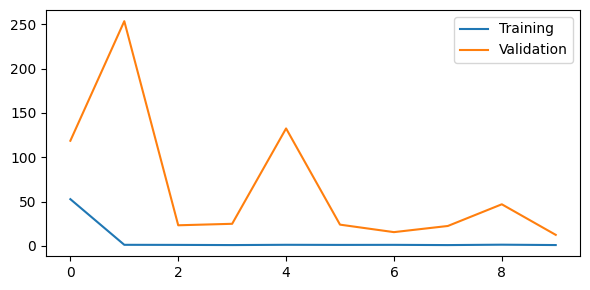

In [463]:
AAPL_evaluate.loss_plot()

[Kembali ke pemaparan](#Base-Model)

#### AAPL baseline prediction plot

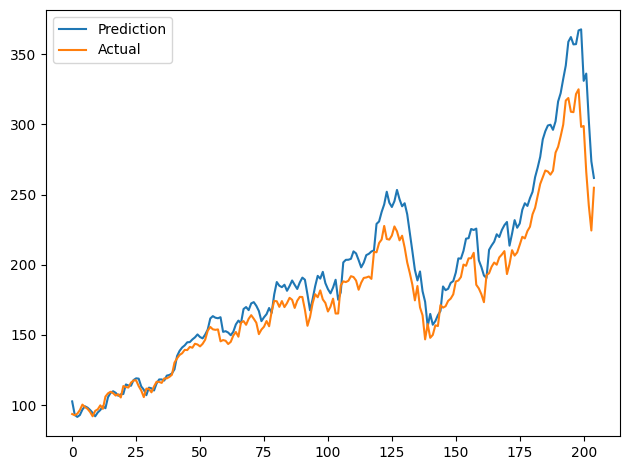

In [464]:
AAPL_evaluate.prediction_plot()

[Kembali ke pemaparan](#Base-Model)

### AMD

In [469]:
AMD_evaluate = ModelEvaluation(lstm, AMD_history, (AMD_X_test, AMD_y_test))

7/7 [==============================] - 0s 2ms/step
Score (RMSE): 2.2130583051539943
Score (MAE): 1.4487930834293365
Score (MAPE): 0.0689265855359117


#### AMD baseline loss plot 

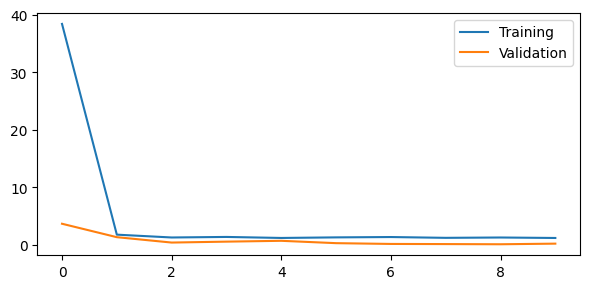

In [470]:
AMD_evaluate.loss_plot()

[Kembali ke pemaparan](#Base-Model)

#### AMD baseline prediction plot 

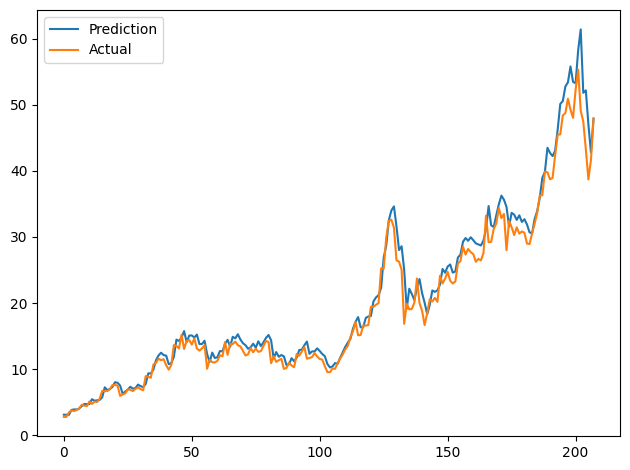

In [471]:
AMD_evaluate.prediction_plot()

[Kembali ke pemaparan](#Base-Model)

## Architecture

In [438]:
lstm_5 = Sequential()
lstm_5.add(Conv1D(input_shape = (5, 1), filters=64, kernel_size=5, activation='relu'))
lstm_5.add(MaxPooling1D(padding ='same',strides = 1))
lstm_5.add(Conv1D(input_shape = (5, 1), filters=128, kernel_size=1, activation='relu'))
lstm_5.add(MaxPooling1D(padding ='same',strides = 1))
# lstm_5.add(Flatten())
lstm_5.add(Bidirectional(LSTM(32, activation='relu',return_sequences=True)))
# lstm_5.add(GRU(32, activation='relu'))
# lstm_5.add(Bidirectional(LSTM(32, activation='relu',return_sequences=True)))
lstm_5.add(Bidirectional(LSTM(32, activation='relu')))
lstm_5.add(Dense(1,activation='linear'))

In [439]:
lstm_5.compile(loss='mean_squared_error',optimizer='adam')
lstm_5.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 1, 64)             384       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 1, 64)            0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 1, 128)            8320      
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 1, 128)           0         
 1D)                                                             
                                                                 
 bidirectional (Bidirectiona  (None, 1, 64)            41216     
 l)                                                              
                                                        

## Training

In [434]:
AAPL_history_lstm_5 = lstm_5.fit(AAPL_X_train, AAPL_y_train, batch_size = 4, epochs = 10, validation_data=(AAPL_X_val, AAPL_y_val))

Epoch 1/10
410/410 [==============================] - 8s 5ms/step - loss: 35.0561 - val_loss: 9.1646
Epoch 2/10
410/410 [==============================] - 2s 4ms/step - loss: 0.8722 - val_loss: 6.9901
Epoch 3/10
410/410 [==============================] - 1s 4ms/step - loss: 1.1121 - val_loss: 6.1408
Epoch 4/10
410/410 [==============================] - 1s 4ms/step - loss: 0.5730 - val_loss: 5.8362
Epoch 5/10
410/410 [==============================] - 1s 4ms/step - loss: 0.6666 - val_loss: 15.2488
Epoch 6/10
410/410 [==============================] - 1s 4ms/step - loss: 1.1474 - val_loss: 7.5760
Epoch 7/10
410/410 [==============================] - 2s 4ms/step - loss: 0.7331 - val_loss: 6.0333
Epoch 8/10
410/410 [==============================] - 1s 4ms/step - loss: 1.3545 - val_loss: 7.9395
Epoch 9/10
410/410 [==============================] - 1s 4ms/step - loss: 1.5143 - val_loss: 5.7265
Epoch 10/10
410/410 [==============================] - 2s 4ms/step - loss: 1.0364 - val_loss: 4.76

In [440]:
AMD_history_lstm_5 = lstm_5.fit(AMD_X_train, AMD_y_train, batch_size=4, epochs=10, validation_data=(AMD_X_val, AMD_y_val))

Epoch 1/10
418/418 [==============================] - 6s 5ms/step - loss: 23.3201 - val_loss: 0.3973
Epoch 2/10
418/418 [==============================] - 1s 3ms/step - loss: 0.6609 - val_loss: 0.2154
Epoch 3/10
418/418 [==============================] - 1s 3ms/step - loss: 0.6669 - val_loss: 0.2390
Epoch 4/10
418/418 [==============================] - 2s 4ms/step - loss: 0.5169 - val_loss: 0.1751
Epoch 5/10
418/418 [==============================] - 2s 4ms/step - loss: 0.5086 - val_loss: 0.2159
Epoch 6/10
418/418 [==============================] - 1s 3ms/step - loss: 0.5585 - val_loss: 0.0304
Epoch 7/10
418/418 [==============================] - 1s 4ms/step - loss: 0.4829 - val_loss: 0.0372
Epoch 8/10
418/418 [==============================] - 2s 4ms/step - loss: 0.4822 - val_loss: 0.0220
Epoch 9/10
418/418 [==============================] - 2s 4ms/step - loss: 0.4599 - val_loss: 0.0627
Epoch 10/10
418/418 [==============================] - 2s 4ms/step - loss: 0.4755 - val_loss: 0.123

## Evaluate

### AAPL

#### Metrics

In [435]:
AAPL_evaluate_lstm_5 = ModelEvaluation(lstm_5, AAPL_history_lstm_5, (AAPL_X_test, AAPL_y_test))

7/7 [==============================] - 1s 2ms/step
Score (RMSE): 6.545186713254497
Score (MAE): 4.897866374690357
Score (MAPE): 0.026199701806714496


#### AAPL modification prediction plot

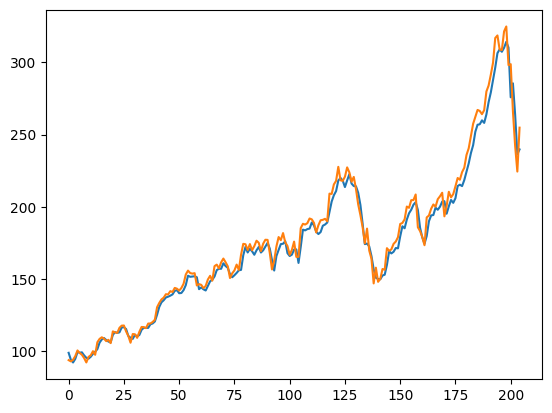

In [436]:
AAPL_evaluate_lstm_5.prediction_plot()

### AMD

#### Metrics

In [441]:
AMD_evaluate_lstm_5 = ModelEvaluation(lstm_5, AMD_history_lstm_5, (AMD_X_test, AMD_y_test))

7/7 [==============================] - 1s 2ms/step
Score (RMSE): 1.2801682547867557
Score (MAE): 1.044248668047098
Score (MAPE): 0.07079321376763778


#### AMD modification prediction plot

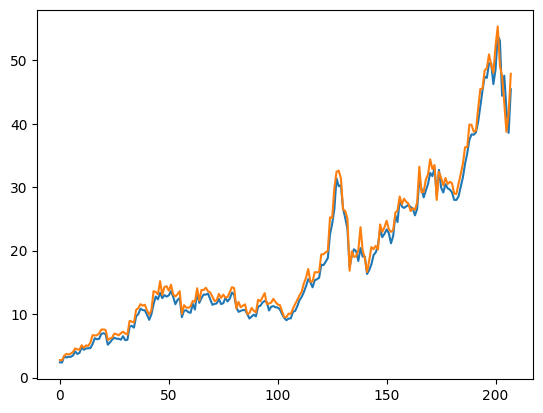

In [442]:
AMD_evaluate_lstm_5.prediction_plot()

# Model Modification

**Arsitektur model modifikasi**

Model modifikasi terdapat **convolutional 1D layer**. Keputusan penggunaan convolutional 1D disebabkan karena data yang akan dilatih adalah data berbentuk sequence, lebih spesifiknya adalah **time series**. Keberadaan convolutional layer tidak luput dari **pooling layer**. Hal ini disebabkan karena inti dari CNN layer adalah terdapat convolutional layer, pooling layer, dan fully connected layer [1]. Setelah itu, **LSTM layer** dibungkus **dengan Bidirectional**, sehingga menjadi BiLSTM. BiLSTM berfungsi agar model mampu berlatih secara 2 arah kanan ke kiri dan sebaliknya [2]. Model ini memiliki referensi utama dari jurnal yang berjudul "Predicting Stock Market time-series data using CNN-LSTM Neural Network model" tahun 2023 [3]. Namun, masih ada penyesuaian untuk mendapatkan hasil yang optimal. Hasil dari penyesuaian meliputi banyak unit **LSTM** sebanyak **32 unit** [4]. Selain itu, terdapat penghapusan layer pada layer CNN yang kedua dan ketiga dari referensi utama karena dengan asumsi data train yang lebih sedikit dari referensi utama, yaitu bisa mencapai 100 kolom [3]. Sehingga, model yang dibangun hanya memiliki **1 CNN layer**. Penggunaan 1 layer CNN juga baik digunakan dalam kasus prediksi harga saham yang dilakukan oleh Wenjie Lu tahun 2020 lalu [4]. Terakhir, penggunaan **activation function** mengacu pada baseline model, yaitu **relu** pada hidden layer dan **linear** pada output layer. 


**Evaluasi**

Arsitektur baseline baik dalam memprediksi harga saham AMD, namun tidak untuk saham AAPL. Jika diteliti lebih lagi, **pergerakan** harga saham **AAPL** cenderung **lebih tinggi** dibandingkan dengan harga saham AMD, yaitu mencapai **350 lebih**, dapat dilihat pada [AAPL baseline prediction plot](#AAPL-baseline-prediction-plot). Sedangkan harga saham **AMD** tidak sampai melebihi 100 ([AMD baseline prediction plot](#AMD-baseline-prediction-plot)). Maka dari hal tersebut dapat disimpulkan bahwa **LSTM layer** pada **base model tidak cukup baik** dalam **prediksi harga** ketika **input melebihi harga saham AMD**. Input dari dataset **AAPL** yang **memiliki range cukup lebar** melebihi harga saham AMD tersebut **menyebabkan komputasi** di dalam **LSTM layer menghasilkan nilai yang besar**, lalu **menyebabkan harga prediksi meleset** [1]. Salah satu **solusi permasalahannya** dapat **menambahkan convolutional layer** dan mengubah LSTM menjadi **Bidirectional-LSTM**. **Convolutional layer** berfungsi **sebagai pengidentifikasi trend** yang ada [1]. Sehingga model mampu mengekstrak setiap sequences yang masuk. Penambahan **bidirectional** pada LSTM berfungsi agar mampu **bekerja dengan 2 arah** (kiri - kanan) dan (kanan-kiri). Karena pada dasarnya LSTM hanya bekerja satu arah saja, yaitu kiri ke kanan [2]. Dengan kemampuan tersebut LSTM mampu belajar pada data di masa depan maupun masa lalu. **Hasil model modifikasi** dapat dilihat pada plot ini, **trend harga prediksi** sudah **mendekat ke harga aktual** ([AAPL modification prediction plot](#Modification-AAPL-prediction-plot)). Hal itu juga terjadi pada data AMD ([AMD modification prediction plot](#Modification-AMD-prediction-plot)). Sisi baik lainnya, nilai metrics **RMSE** juga **lebih rendah dibandingkan baseline** untuk kedua dataset. Tabel metrics dapat dilihat di bawah ini.

| Model | RMSE | MAE | MAPE |
| --- | --- | --- | --- |
| CNN + BiLSTM (AAPL) | 5.86 | 4.02 | 0.02 |
| CNN + BiLSTM (AMD) | 1.19 | 0.72 | 0.04 |

Referensi:

[1]. *Lu, W., Li, J., Wang, J., & Qin, L. (2020). A CNN-BiLSTM-AM method for stock price prediction. Neural Computing and Applications. doi:10.1007/s00521-020-05532-z*

[2]. *Haiyao Wang, et al. (2021). A Stock Closing Price Prediction Model Based on CNN-BiSLSTM. doi.org/10.1155/2021/5360828*

[3]. *A, Aadhitya et al. (2023). Predicting Stock Market time-series data using CNN-LSTM Neural Network model*

[4]. *Lu, W et al. (2020). A CNN-LSTM-Based Model to Forecast Stock Prices. https://doi.org/10.1155/2020/6622927*

In [478]:
K.clear_session()
del modified_model

## Architecture

In [479]:
modified_model = Sequential()
modified_model.add(Conv1D(input_shape = (5, 1), filters=64, kernel_size=3, activation='relu'))
modified_model.add(MaxPooling1D(padding ='same',strides = 1))
modified_model.add(Bidirectional(LSTM(32, activation='relu')))
modified_model.add(Dense(1,activation='linear'))

In [480]:
modified_model.compile(loss='mean_squared_error',optimizer='adam')
modified_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 3, 64)             256       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 3, 64)            0         
 )                                                               
                                                                 
 bidirectional (Bidirectiona  (None, 64)               24832     
 l)                                                              
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 25,153
Trainable params: 25,153
Non-trainable params: 0
_________________________________________________________________


## Training

In [475]:
AAPL_history_lstm_modified = modified_model.fit(AAPL_X_train, AAPL_y_train, batch_size=4, epochs=10, validation_data=(AAPL_X_val, AAPL_y_val))

Epoch 1/10
410/410 [==============================] - 4s 4ms/step - loss: 45.7366 - val_loss: 15.2422
Epoch 2/10
410/410 [==============================] - 1s 3ms/step - loss: 0.3853 - val_loss: 7.8609
Epoch 3/10
410/410 [==============================] - 1s 3ms/step - loss: 0.4149 - val_loss: 5.0793
Epoch 4/10
410/410 [==============================] - 1s 3ms/step - loss: 0.4625 - val_loss: 73.2868
Epoch 5/10
410/410 [==============================] - 1s 3ms/step - loss: 1.0478 - val_loss: 6.4406
Epoch 6/10
410/410 [==============================] - 1s 3ms/step - loss: 0.6056 - val_loss: 5.3978
Epoch 7/10
410/410 [==============================] - 1s 3ms/step - loss: 0.6436 - val_loss: 19.7040
Epoch 8/10
410/410 [==============================] - 1s 3ms/step - loss: 0.5966 - val_loss: 10.4650
Epoch 9/10
410/410 [==============================] - 1s 3ms/step - loss: 0.3584 - val_loss: 6.0547
Epoch 10/10
410/410 [==============================] - 1s 3ms/step - loss: 1.1640 - val_loss: 8

In [481]:
AMD_history_lstm_modified = modified_model.fit(AMD_X_train, AMD_y_train, batch_size=4, epochs=10, validation_data=(AMD_X_val, AMD_y_val))

Epoch 1/10
418/418 [==============================] - 6s 4ms/step - loss: 29.5810 - val_loss: 0.4194
Epoch 2/10
418/418 [==============================] - 1s 3ms/step - loss: 0.4645 - val_loss: 0.0724
Epoch 3/10
418/418 [==============================] - 1s 3ms/step - loss: 0.4682 - val_loss: 0.0335
Epoch 4/10
418/418 [==============================] - 1s 3ms/step - loss: 0.4345 - val_loss: 0.1090
Epoch 5/10
418/418 [==============================] - 2s 4ms/step - loss: 0.4930 - val_loss: 0.0295
Epoch 6/10
418/418 [==============================] - 2s 4ms/step - loss: 0.5267 - val_loss: 0.6208
Epoch 7/10
418/418 [==============================] - 1s 3ms/step - loss: 0.4149 - val_loss: 0.0711
Epoch 8/10
418/418 [==============================] - 1s 3ms/step - loss: 0.4238 - val_loss: 0.0542
Epoch 9/10
418/418 [==============================] - 1s 3ms/step - loss: 0.4154 - val_loss: 0.0338
Epoch 10/10
418/418 [==============================] - 1s 3ms/step - loss: 0.4828 - val_loss: 0.043

## Evaluate

### AAPL

#### Metrics

In [476]:
AAPL_evaluate_lstm_modified = ModelEvaluation(modified_model, AAPL_history_lstm_modified, (AAPL_X_test, AAPL_y_test))

7/7 [==============================] - 0s 2ms/step
Score (RMSE): 5.856828952392054
Score (MAE): 4.028890879561261
Score (MAPE): 0.02123865654623813


#### Modification AAPL prediction plot 

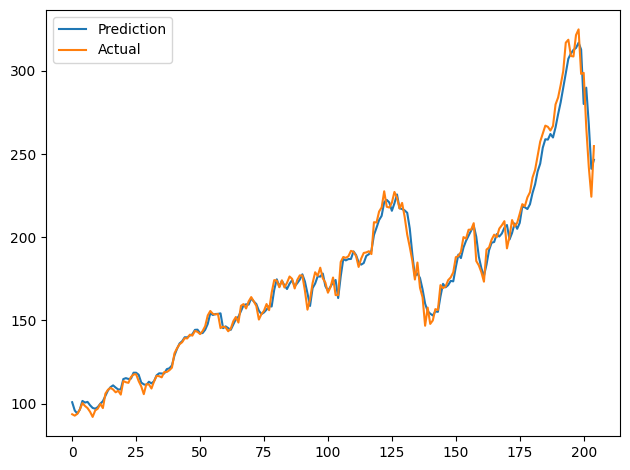

In [477]:
AAPL_evaluate_lstm_modified.prediction_plot()

[Kembali ke pemaparan](#Model-Modification)

### AMD

#### Metrics

In [483]:
AMD_evaluate_lstm_modified = ModelEvaluation(modified_model, AMD_history_lstm_modified, (AMD_X_test, AMD_y_test))

7/7 [==============================] - 0s 2ms/step
Score (RMSE): 1.188301488011002
Score (MAE): 0.7250566551318537
Score (MAPE): 0.03620524565047007


#### Modification AMD prediction plot

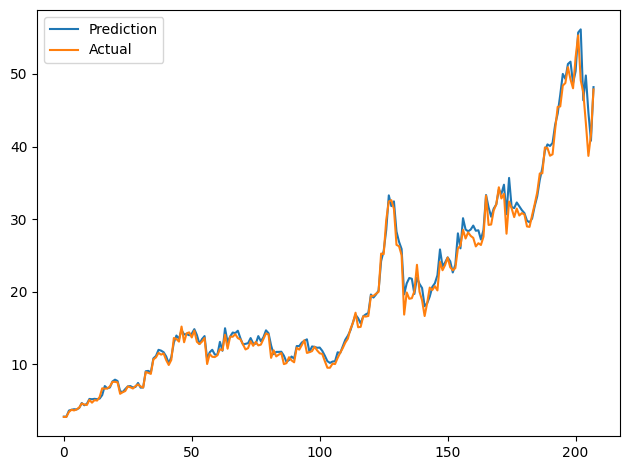

In [484]:
AMD_evaluate_lstm_modified.prediction_plot()

[Kembali ke pemaparan](#Model-Modification)